# Customer Churn Prediction

## Data Description :

The dataset provided  contains information about customers of a financial institution, designed to help you build a model to predict customer churn. The data includes various attributes related to the customers' demographics, account information, and transaction history. Here's a brief overview of the key columns in the dataset:**

* **CustomerId:** A unique identifier for each customer.
* **Surname:** The last name of the customer (irrelevant for modeling but useful for identification).
* **CreditScore:** A numerical score representing the customer's creditworthiness.
* **Geography:** The country of residence of the customer (e.g., France, Germany, Spain).
* **Gender:** The gender of the customer (Male or Female).
* **Age:** The age of the customer.
* **Tenure:** The number of years the customer has been with the bank.
* **Balance:** The current balance in the customer's account.
* **NumOfProducts:** The number of products the customer has with the bank.
* **HasCrCard:** Whether the customer has a credit card (1 = Yes, 0 = No).
* **IsActiveMember:** Whether the customer is an active member (1 = Yes, 0 = No).
* **EstimatedSalary:** The estimated annual salary of the customer.
* **Exited:** The target variable, indicating whether the customer has churned (1 = Yes, 0 = No).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic Data Exploration: 

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [29]:
# reading the dataset

CustomerData = pd.read_csv(filepath_or_buffer='D://data science//Python//1.projects//Customer Churn Prediction//train.csv',
                          sep=',',encoding='latin-1')

print('Customer data before deleting duplicates :',CustomerData.shape)
CustomerData= CustomerData.drop_duplicates()
print('Customer data after deleting duplicates :',CustomerData.shape)

CustomerData.head(10)

Customer data before deleting duplicates : (15000, 14)
Customer data after deleting duplicates : (15000, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15642345.0,Ikedinachukwu,659.0,France,Male,42.0,7.0,0.00,2.0,1.0,0.0,184843.77,0.0
1,1,15765311.0,Zikoranachidimma,749.0,France,Male,29.0,9.0,0.00,2.0,1.0,0.0,162960.05,0.0
2,2,15727499.0,Rizzo,590.0,France,Female,37.0,2.0,0.00,2.0,0.0,1.0,131804.86,0.0
3,3,15701166.0,Chidimma,477.0,Germany,Male,44.0,8.0,141078.37,1.0,1.0,0.0,60778.11,1.0
4,4,15574554.0,Obialo,584.0,Spain,Female,31.0,6.0,0.00,2.0,1.0,0.0,136050.77,0.0
5,5,15674678.0,Folliero,719.0,France,Male,29.0,1.0,0.00,2.0,1.0,1.0,188187.05,0.0
6,6,15572735.0,Toscani,583.0,France,Female,32.0,2.0,0.00,1.0,1.0,0.0,66485.26,1.0
7,7,15758836.0,Trevisani,596.0,France,Male,32.0,4.0,123971.51,1.0,1.0,0.0,130755.34,0.0
8,8,15588580.0,Pagnotto,663.0,France,Male,37.0,8.0,0.00,2.0,1.0,1.0,113868.20,0.0
9,9,15608916.0,Y?,584.0,France,Female,38.0,2.0,0.00,2.0,1.0,1.0,1710.89,0.0


In [30]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [31]:
CustomerData.describe(include='all')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,NaN,751,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ch'iu,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,276,NaN,8980,8506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7499.500000,1.569151e+07,NaN,658.501533,NaN,NaN,37.895133,5.080733,43006.303826,1.582200,0.792667,0.492067,117038.969929,0.206400
std,4330.271354,1.453714e+05,NaN,73.266675,NaN,NaN,8.221961,2.785977,59813.835788,0.528831,0.405410,0.499954,45695.548784,0.404734
min,0.000000,1.569179e+05,NaN,431.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563538e+07,NaN,602.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82556.580000,0.000000
50%,7499.500000,1.569016e+07,NaN,661.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122268.750000,0.000000
75%,11249.250000,1.575756e+07,NaN,709.000000,NaN,NaN,42.000000,7.000000,110414.480000,2.000000,1.000000,1.000000,155879.547500,0.000000


In [32]:
CustomerData.nunique()

id                 15000
CustomerId          6223
Surname              751
CreditScore          380
Geography              3
Gender                 2
Age                   56
Tenure                11
Balance             3388
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     6187
Exited                 2
dtype: int64

**<u> OBSERVATION :</u>**

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* **id:** Qualitative.Rejected.
* **CustomerId:** Qualitative. Rejected.
* **Surname:** Qualitative. Rejected.
* **CreditScore:** Continuous. Selected.
* **Geography:** Categorical. Selected.
* **Gender:** Categorical. Selected.
* **Age:** Continuous. Selected.
* **Tenure:** Categorical. Selected.
* **Balance:** Continuous. Selected.
* **NumOfProducts:** Categorical. Selected.
* **HasCrCard:** Categorical. Selected.
* **IsActiveMember:** Categorical. Selected.
* **EstimatedSalary:** Continuous. Selected.
* **Exited:** Categorical. Selected. <b> This is the target Variable</b>


### Removing useless columns from the data

In [33]:
UselessColumn = ['id','CustomerId','Surname']
CustomerData=CustomerData.drop(columns=UselessColumn,axis=1)

CustomerData.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,659.0,France,Male,42.0,7.0,0.00,2.0,1.0,0.0,184843.77,0.0
1,749.0,France,Male,29.0,9.0,0.00,2.0,1.0,0.0,162960.05,0.0
2,590.0,France,Female,37.0,2.0,0.00,2.0,0.0,1.0,131804.86,0.0
3,477.0,Germany,Male,44.0,8.0,141078.37,1.0,1.0,0.0,60778.11,1.0
4,584.0,Spain,Female,31.0,6.0,0.00,2.0,1.0,0.0,136050.77,0.0


# Defining the problem statement:

The task is to build a model that predicts the likelihood of customer churn based on the features provided.

* Targer Variable: Exited
* ML Model : Supervised ML Classification Model

### Distribution of the Target variable

Exited
0.0    11904
1.0     3096
Name: count, dtype: int64

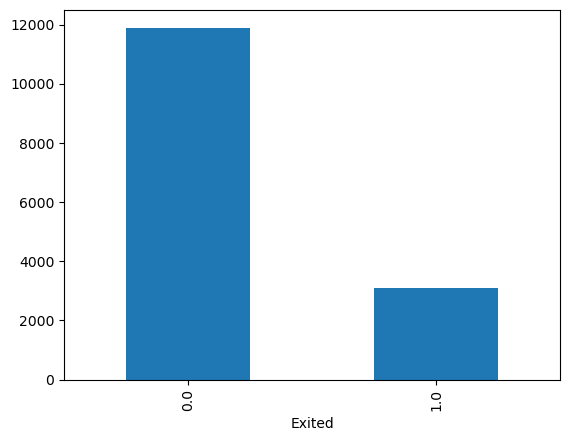

In [34]:
CustomerData.groupby(['Exited']).size().plot(kind='bar')
CustomerData['Exited'].value_counts()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.Out of the two Category, one category has more rows that the other.

# Visual Exploratory Data Analysis:

* Categorical Variables : Bar plot
* Continuous Variable : Histogram

Based on the Basix Data Exploration above, 

<b> Categorical Predictors: </b>   

We can use bar chart to see how the data is distributed for these categorical variables

<b> Continuous Variable: </b> 

We can use histogram to see how the data is distributed for these continuous variables

'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

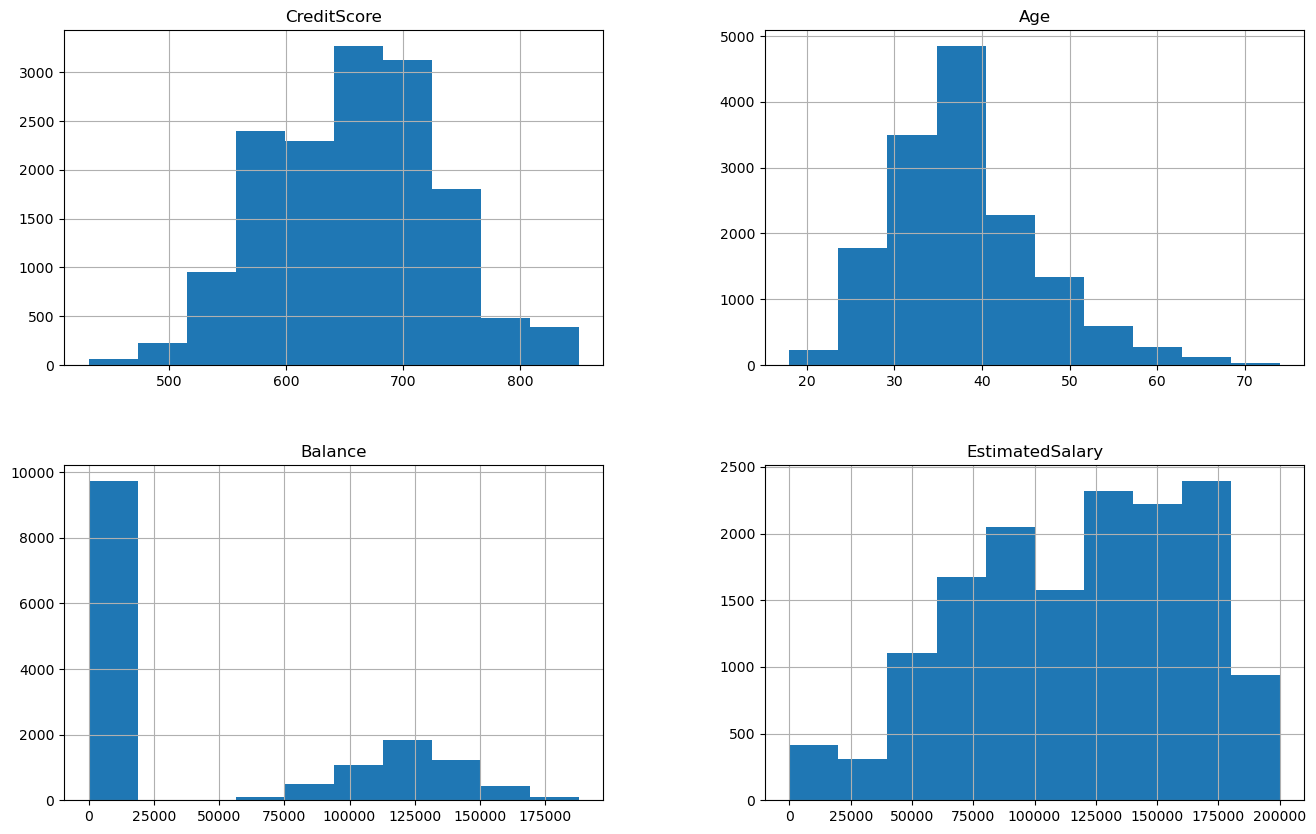

In [35]:
# Continuous Predictors

CustomerData.hist(['CreditScore','Age','Balance','EstimatedSalary'], figsize=(16,10))

## Histogram Intrepretation:

Selected predcitors : 'CreditScore','Age','Balance','EstimatedSalary'

In [36]:
# Categorical Predictors:

def MultPlot(dfname,ColsToPlot):
    
    fig,subplot = plt.subplots(nrows=1, ncols=len(ColsToPlot), figsize = (36,6))
    fig.suptitle('Bar Chart of '+ str(ColsToPlot))
    
    for col,index in zip(ColsToPlot,range(len(ColsToPlot))):
        CustomerData.groupby([col]).size().plot(kind='bar',ax=subplot[index])

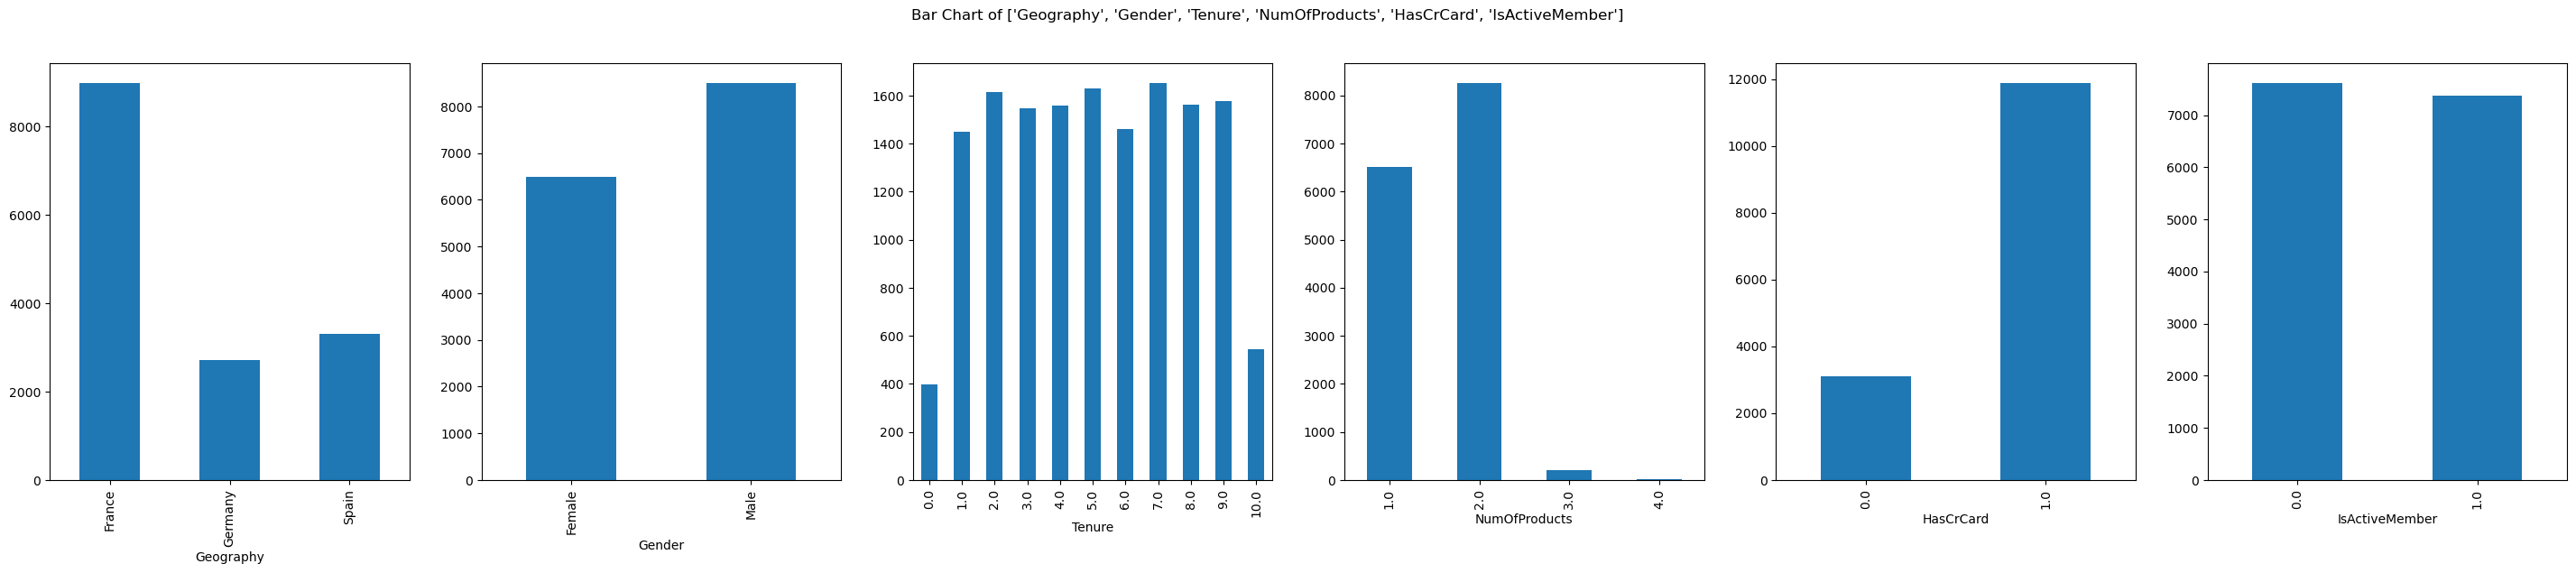

In [37]:
MultPlot(dfname=CustomerData,ColsToPlot=['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])

In [38]:
CustomerData['NumOfProducts'][CustomerData['NumOfProducts']>=3]=3

C:\Users\kumar\AppData\Local\Temp\ipykernel_32780\1106529569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerData['NumOfProducts'][CustomerData['NumOfProducts']>=3]=3


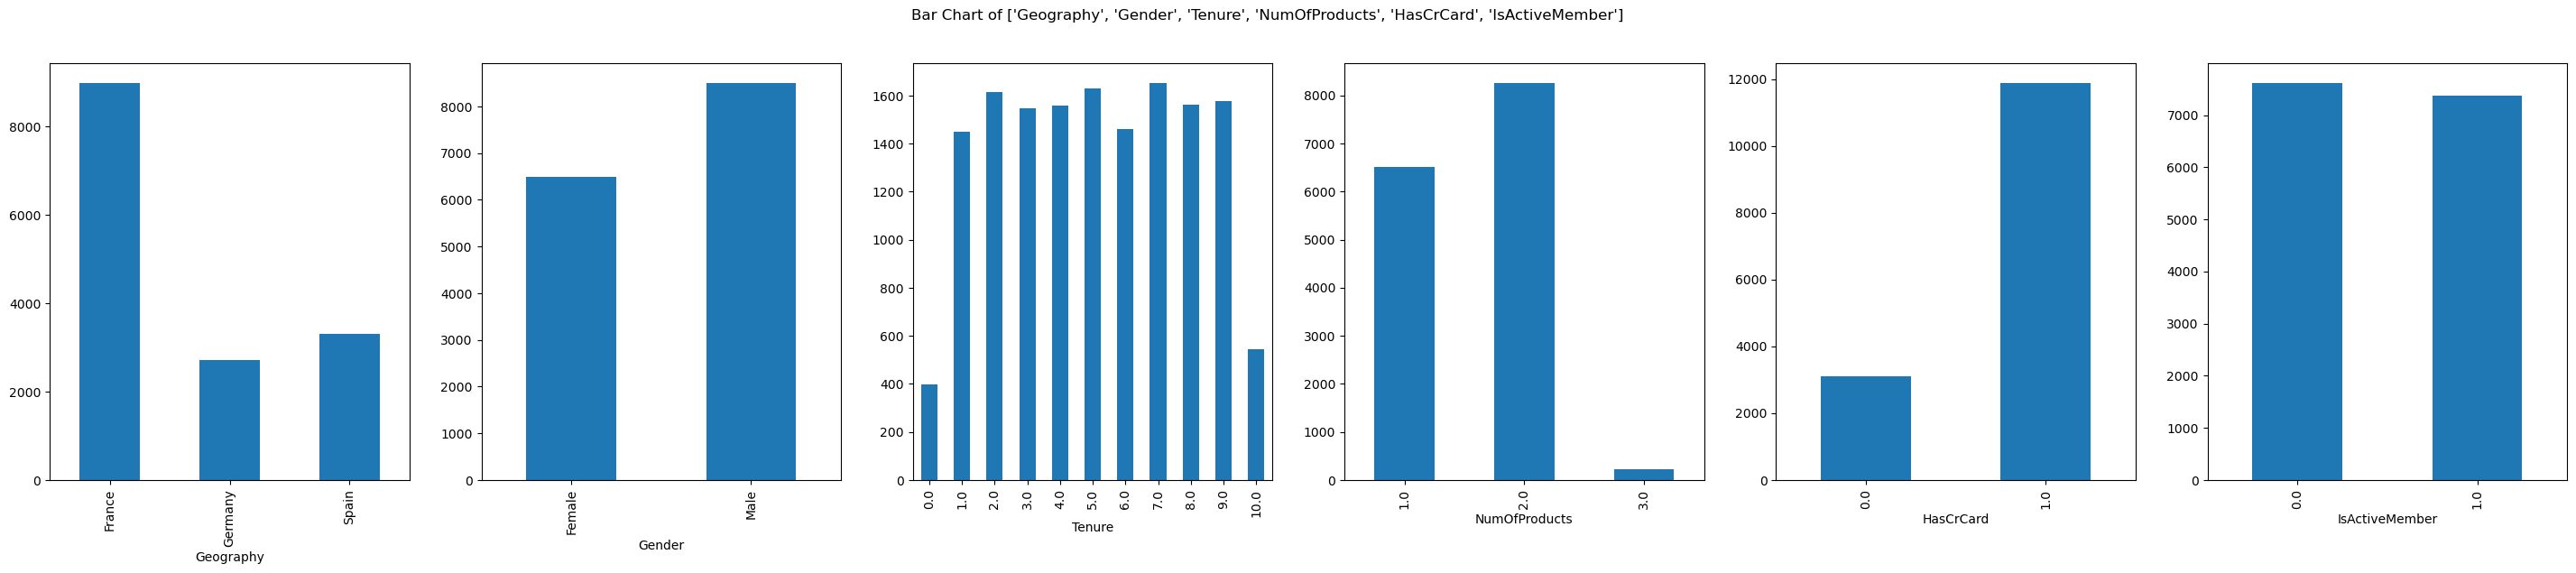

In [39]:
MultPlot(dfname=CustomerData,ColsToPlot=['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

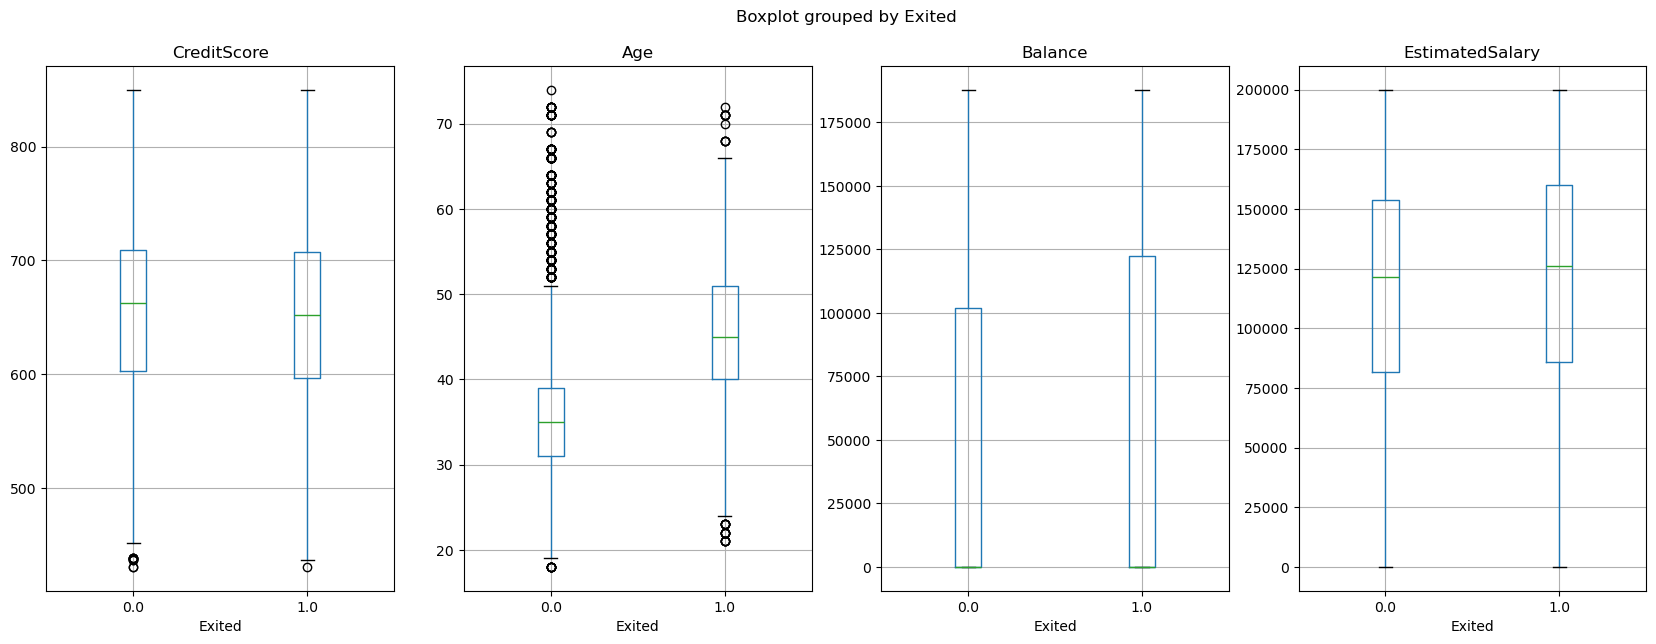

In [40]:
ContPredictors = ['CreditScore','Age','Balance','EstimatedSalary']

fig,subplot = plt.subplots(nrows=1,ncols=len(ContPredictors),figsize=(20,7))

for cols,index in zip(ContPredictors,range(len(ContPredictors))):
    CustomerData.boxplot(column=cols,by='Exited',vert=True,ax=subplot[index])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [41]:
def FunctionANOVA(dfname,TargetVariable,ContPredictors):
    from scipy.stats import f_oneway
    
    SelectedPredictors=[]
    print('---------------------------------------- ANOVA Results ----------------------------------\n')
    
    for cols in ContPredictors:
        CatGroupList = dfname.groupby(TargetVariable)[cols].apply(list)
        AnovaResults = f_oneway(*CatGroupList)
        
        if AnovaResults[1] <0.05:
            print(cols,'is correlated with',TargetVariable,' | P_Value:',AnovaResults[1])
            SelectedPredictors.append(cols)
            
        else:
            print(cols,'is not correlated with',TargetVariable,' | P_Value:',AnovaResults[1])
            
    return(SelectedPredictors)

In [42]:
FunctionANOVA(dfname=CustomerData,TargetVariable='Exited',ContPredictors=['CreditScore','Age','Balance','EstimatedSalary'])

---------------------------------------- ANOVA Results ----------------------------------

CreditScore is correlated with Exited  | P_Value: 6.992963734778195e-06
Age is correlated with Exited  | P_Value: 0.0
Balance is correlated with Exited  | P_Value: 1.5935247561534856e-75
EstimatedSalary is correlated with Exited  | P_Value: 9.051612802456445e-06


['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

**Final Selected Continuous Predictors:** 

'CreditScore', 'Age', 'Balance', 'EstimatedSalary'

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

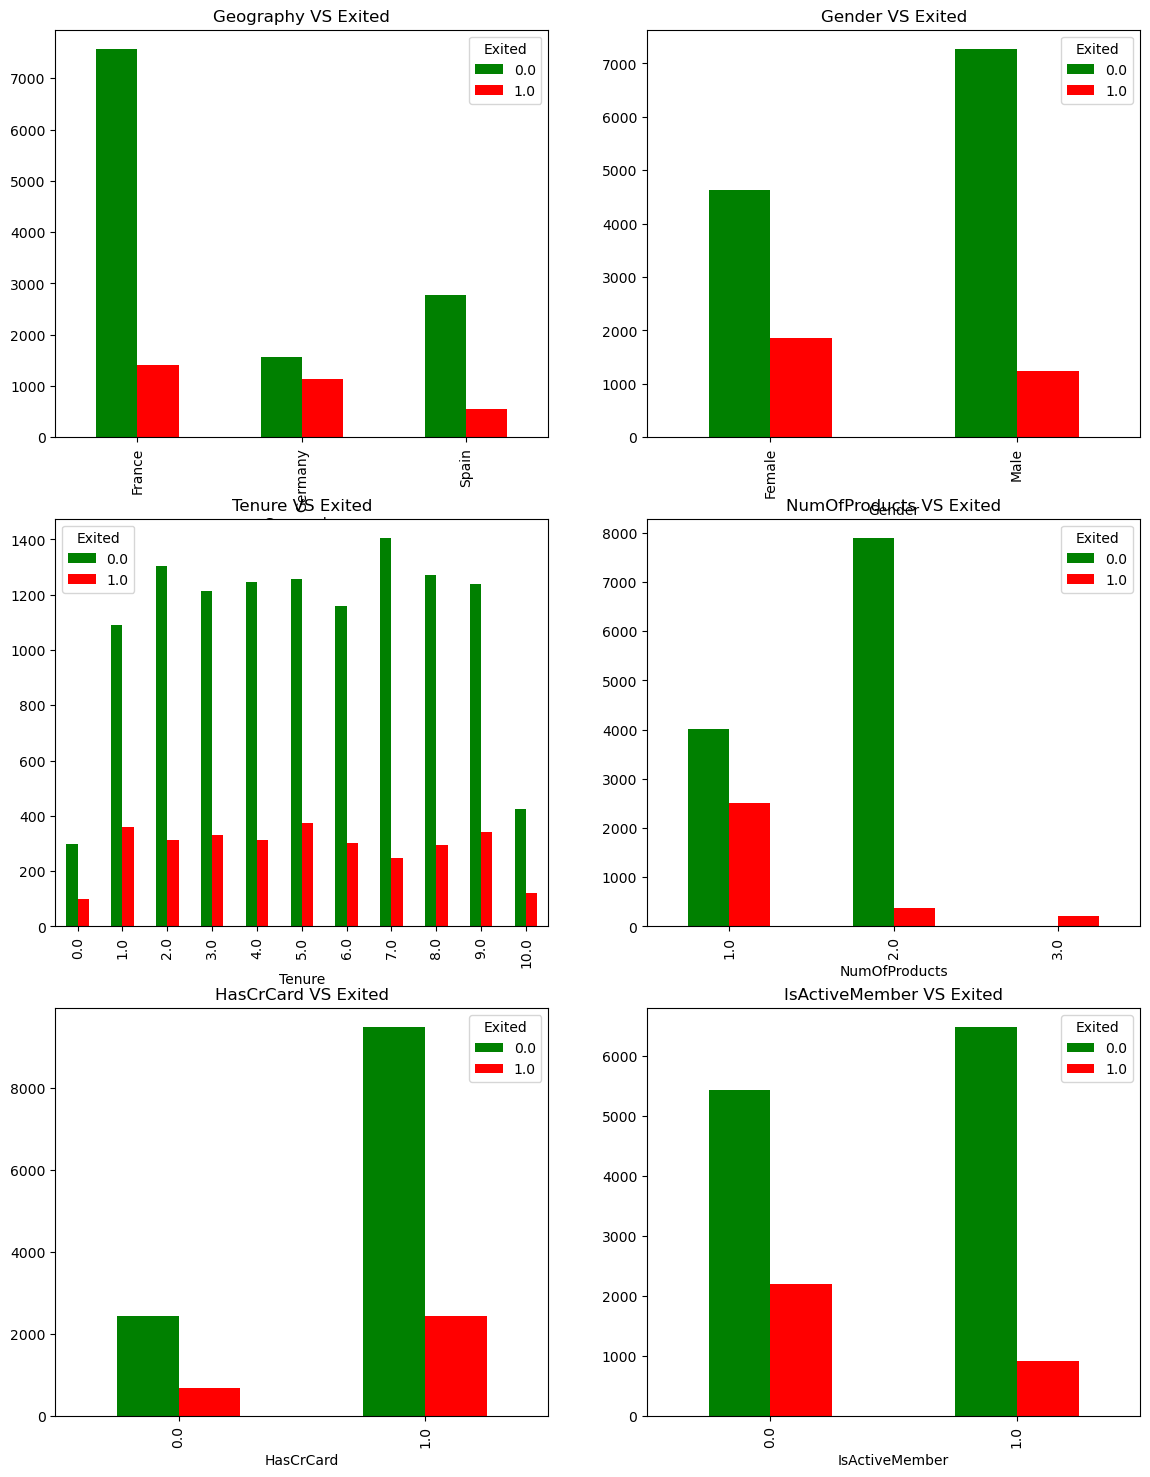

In [43]:
CatPredictors=['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig,subplot = plt.subplots(nrows=3,ncols=2,figsize=(14,18))
subplot=subplot.flatten()

for col,index in zip(CatPredictors,range(len(CatPredictors))):
    CrossTabResult = pd.crosstab(index=CustomerData[col],columns=CustomerData['Exited'])
    CrossTabResult.plot.bar(color=['green','red'],ax=subplot[index],title=col+' VS Exited')

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [44]:
def FunctionChiSq(dfname,TargetVariable,CatPredictors):
    from scipy.stats import chi2_contingency
    
    SelectedPredictors = []
    
    for cols in CatPredictors:
        CrossTabResult = pd.crosstab(index = dfname[TargetVariable],columns=dfname[cols])
        Chi2Result = chi2_contingency(CrossTabResult)
        
        if Chi2Result[1] < 0.05:
            print(cols,' is correlated with ',TargetVariable,'   | P-Value :',Chi2Result[1])
            SelectedPredictors.append(cols)
        else:
            print(cols,' is not correlated with ',TargetVariable,'  | P-Value :', Chi2Result[1])
    return(SelectedPredictors)

In [45]:
FunctionChiSq(dfname=CustomerData,TargetVariable='Exited',
              CatPredictors=['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])

Geography  is correlated with  Exited    | P-Value : 1.3648656383328088e-203
Gender  is correlated with  Exited    | P-Value : 8.507663730322871e-99
Tenure  is correlated with  Exited    | P-Value : 5.576796722445767e-10
NumOfProducts  is correlated with  Exited    | P-Value : 0.0
HasCrCard  is not correlated with  Exited   | P-Value : 0.10477752723462491
IsActiveMember  is correlated with  Exited    | P-Value : 1.6807050522860084e-135


['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'IsActiveMember']

**Selected Categorical Predictors:** 

'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'IsActiveMember'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [46]:
SelectedColumns= ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                  'NumOfProducts',  'IsActiveMember', 'EstimatedSalary',] 

DataForML = CustomerData[SelectedColumns]
DataForML.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,659.0,France,Male,42.0,7.0,0.00,2.0,0.0,184843.77
1,749.0,France,Male,29.0,9.0,0.00,2.0,0.0,162960.05
2,590.0,France,Female,37.0,2.0,0.00,2.0,1.0,131804.86
3,477.0,Germany,Male,44.0,8.0,141078.37,1.0,0.0,60778.11
4,584.0,Spain,Female,31.0,6.0,0.00,2.0,0.0,136050.77


In [47]:
DataForML['Gender'].replace({'Male':0,'Female':1},inplace=True)
DataForML.head()

C:\Users\kumar\AppData\Local\Temp\ipykernel_32780\2141245568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Gender'].replace({'Male':0,'Female':1},inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,659.0,France,0,42.0,7.0,0.00,2.0,0.0,184843.77
1,749.0,France,0,29.0,9.0,0.00,2.0,0.0,162960.05
2,590.0,France,1,37.0,2.0,0.00,2.0,1.0,131804.86
3,477.0,Germany,0,44.0,8.0,141078.37,1.0,0.0,60778.11
4,584.0,Spain,1,31.0,6.0,0.00,2.0,0.0,136050.77


In [48]:
MLTestData = pd.get_dummies(DataForML,dtype=int)
MLTestData['Exited'] = CustomerData['Exited']

MLTestData.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,659.0,0,42.0,7.0,0.00,2.0,0.0,184843.77,1,0,0,0.0
1,749.0,0,29.0,9.0,0.00,2.0,0.0,162960.05,1,0,0,0.0
2,590.0,1,37.0,2.0,0.00,2.0,1.0,131804.86,1,0,0,0.0
3,477.0,0,44.0,8.0,141078.37,1.0,0.0,60778.11,0,1,0,1.0
4,584.0,1,31.0,6.0,0.00,2.0,0.0,136050.77,0,0,1,0.0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [49]:
MLTestData.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Exited'],
      dtype='object')

In [50]:
TargetVariable = 'Exited'
Predictors = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain']

X= MLTestData[Predictors].values
y= MLTestData[TargetVariable].values

from sklearn.preprocessing import MinMaxScaler, StandardScaler
PredictorScaler = MinMaxScaler().fit(X)
X = PredictorScaler.transform(X)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=405)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10500, 11)
(10500,)
(4500, 11)
(4500,)


# Logistic Regression


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

Log_Reg = LogisticRegression(C=7,penalty='l2',solver='newton-cg')
Log_Reg.fit(X_train,y_train)
y_predicted = Log_Reg.predict(X_test)

# Measuring Accuracy on test data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average = 'weighted')
print('Accuracy of the model on Sample data:',round(F1_Score,2))


## Running 10-fold Cross Validation 
Accuracy = cross_val_score(Log_Reg,X,y,cv=10,scoring='f1_weighted')
print('Accuracy for the 10-fold cross validation', Accuracy)
print('\n Final Accuracy of the model :',round(Accuracy.mean(),2))

## Predicted Column 
TestData = pd.DataFrame(y_test,columns=['Exited'])
TestData['Predicted Exited'] = y_predicted
TestData.head()

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      3575
         1.0       0.75      0.54      0.63       925

    accuracy                           0.87      4500
   macro avg       0.82      0.75      0.78      4500
weighted avg       0.86      0.87      0.86      4500

[[3410  165]
 [ 421  504]]
Accuracy of the model on Sample data: 0.86
AUC Score : 0.7493555093555092
Accuracy for the 10-fold cross validation [0.85120049 0.85438311 0.85581073 0.87419877 0.84408054 0.85653433
 0.85836877 0.87688772 0.85875815 0.85517652]

 Final Accuracy of the model : 0.86


,Exited,Predicted Exited
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0


# Decision Tree 

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      3575
         1.0       0.79      0.65      0.71       925

    accuracy                           0.89      4500
   macro avg       0.85      0.80      0.82      4500
weighted avg       0.89      0.89      0.89      4500

[[3414  161]
 [ 324  601]]
Accuracy of the model on test sample data : 0.89
Accuracy for 10-folg cross vaidation : [0.87658494 0.87726011 0.87083819 0.89339738 0.88808941 0.88627211
 0.88687728 0.87744995 0.88276372 0.88977529]

 Final Accuracy of the model : 0.88


<Axes: >

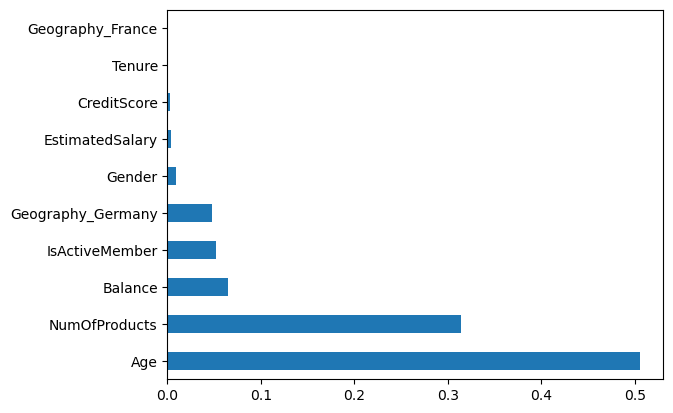

In [62]:
from sklearn.tree import DecisionTreeClassifier

DT_Class = DecisionTreeClassifier(max_depth=6,criterion='gini')
DT_Class.fit(X_train,y_train)
y_predicted = DT_Class.predict(X_test)

# Measuring the accuracy for test data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score= f1_score(y_test,y_predicted,average = 'weighted')
print('Accuracy of the model on test sample data :',round(F1_Score,2))


# Running 10-fold Cross Validation
Accuracy=cross_val_score(DT_Class,X,y,cv=10,scoring = 'f1_weighted')
print('Accuracy for 10-folg cross vaidation :',Accuracy)
print('\n Final Accuracy of the model :',round(Accuracy.mean(),2))

# Plotting the feature importance for Top 10 most important columns
feature_importance=pd.Series(DT_Class.feature_importances_,index=Predictors)
feature_importance.nlargest(10).plot(kind='barh')

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

RF_Class = RandomForestClassifier(max_depth=8,n_estimators=100,criterion='gini')
RF_Class.fit(X_train,y_train)
y_predicted = RF_Class.predict(X_test)

# Measuring Accuracy of the sample data 
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average='weighted')
print('Accuracy of the model on the sample data:',round(F1_Score,2))

# Running 10-fold Cross Validation 
Accuracy = cross_val_score(RF_Class,X,y,cv=10,scoring='f1_weighted')
print('Accuracy of the 10-fold cross validation:',Accuracy)
print('\nFinal Accuarcy of the model :',round(Accuracy.mean(),2))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      3575
         1.0       0.82      0.63      0.72       925

    accuracy                           0.90      4500
   macro avg       0.87      0.80      0.83      4500
weighted avg       0.89      0.90      0.89      4500

[[3449  126]
 [ 340  585]]
Accuracy of the model on the sample data: 0.89
Accuracy of the 10-fold cross validation: [0.88305242 0.87926178 0.88707408 0.90308852 0.8906948  0.885271
 0.89059548 0.88990659 0.88065472 0.88283956]

Final Accuarcy of the model : 0.89


# AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DT_Class = DecisionTreeClassifier(max_depth=5)
ADA_Class = AdaBoostClassifier(n_estimators=100,estimator=DT_Class,learning_rate=0.01)
ADA_Class.fit(X_train,y_train)
y_predicted = ADA_Class.predict(X_test)

# Measuring Accuracy on the Training Data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average='weighted')
print('Accuracy of the model on sample data :',round(F1_Score,2))

# Running the 10-fold cross validation
Accuracy = cross_val_score(ADA_Class,X,y,cv=10,scoring='f1_weighted')
print('Accuracy of the 10-fold cross validation:',Accuracy)
print('The Final Accuracy of the model :',round(Accuracy.mean(),2))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      3575
         1.0       0.78      0.66      0.72       925

    accuracy                           0.89      4500
   macro avg       0.85      0.81      0.82      4500
weighted avg       0.89      0.89      0.89      4500

[[3408  167]
 [ 316  609]]
Accuracy of the model on sample data : 0.89


KeyboardInterrupt: 

# XGBoost

In [ ]:
from xgboost import XGBClassifier

XG_Class = XGBClassifier(max_depth =4,learning_rate=0.01,n_estimators=300,objective = 'binary:logistic',booster='gbtree')
XG_Class.fit(X_train,y_train)
y_predicted = XG_Class.predict(X_test)

# Measuring Accuracy on the Training Data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average='weighted')
print('Accuracy of the model on sample data :',round(F1_Score,2))

# Running the 10-fold cross validation
Accuracy = cross_val_score(XG_Class,X,y,cv=10,scoring='f1_weighted')
print('Accuracy of the 10-fold cross validation:',Accuracy)
print('The Final Accuracy of the model :',round(Accuracy.mean(),2))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
y_predicted = KNN.predict(X_test)

# Measuring Accuracy on the Training Data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average='weighted')
print('Accuracy of the model on sample data :',round(F1_Score,2))

# Running the 10-fold cross validation
Accuracy = cross_val_score(KNN,X,y,cv=10,scoring='f1_weighted')
print('Accuracy of the 10-fold cross validation:',Accuracy)
print('The Final Accuracy of the model :',round(Accuracy.mean(),2))

# SVM 

In [ ]:
from sklearn import svm

SVM_class = svm.SVC(C=3,kernel = 'rbf',gamma=0.1)
SVM_class.fit(X_train,y_train)
y_predicted = SVM_class.predict(X_test)

# Measuring Accuracy on the Training Data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average='weighted')
print('Accuracy of the model on sample data :',round(F1_Score,2))

# Running the 10-fold cross validation
Accuracy = cross_val_score(SVM_class,X,y,cv=10,scoring='f1_weighted')
print('Accuracy of the 10-fold cross validation:',Accuracy)
print('The Final Accuracy of the model :',round(Accuracy.mean(),2))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

NB_Class = GaussianNB()
NB_Class.fit(X_train,y_train)
y_predicted = NB_Class.predict(X_test)

# Measuring Accuracy on the Training Data
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
F1_Score = f1_score(y_test,y_predicted,average='weighted')
print('Accuracy of the model on sample data :',round(F1_Score,2))

# Running the 10-fold cross validation
Accuracy = cross_val_score(NB_Class,X,y,cv=10,scoring='f1_weighted')
print('Accuracy of the 10-fold cross validation:',Accuracy)
print('The Final Accuracy of the model :',round(Accuracy.mean(),2))

# Deployment of the model

Based on the above trials multiple algorith have produced similar kind of average accuracy. Hence, one can be chosen among them.
I am choosing **Decision Tree Classifier** as it is comparitively faster than other model on this data.

In order to deploy the model we follow below steps

    1.Train the model using 100% data available
    2.Save the model as a serialized file which can be stored anywhere
    3.Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [ ]:
# Choosing only the most important variables

TargetVariable = 'Exited'
Predictors = [ 'Gender', 'Age',  'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France',
       'Geography_Germany', 'Geography_Spain']

X= MLTestData[Predictors].values
y= MLTestData[TargetVariable].values

from sklearn.preprocessing import MinMaxScaler

PredictorScaler = MinMaxScaler().fit(X)
X= PredictorScaler.transform(X)

print(X.shape)
print(y.shape)

In [ ]:
# Training the model on 100% Data available
from sklearn.tree import DecisionTreeClassifier

DT_Class = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=37)
Final_dt_Model = DT_Class.fit(X,y)

# Running 10-fold cross validation for the full data
from sklearn.model_selection import cross_val_score

Accuracy = cross_val_score(Final_dt_Model,X,y,cv=10,scoring='f1_weighted')
print('Accuracy for the 10-fold cross validation:',Accuracy)
print('\nFinal Avergae Accuracy of the Model :',round(Accuracy.mean(),2))

In [ ]:
# Save the model as a serialized file which can be stored anywhere
import pickle 


with open('Final_dt_Model.pkl','wb') as fileWriteStream:
    pickle.dump(Final_dt_Model,fileWriteStream)
    fileWriteStream.close()
    


In [ ]:
# Create a function 

def PredictChurnStatus(filename):
    import pandas as pd
    
    filename['Gender'].replace({'Male':0,'Female':1},inplace=True)
    
    filename = pd.get_dummies(filename)
    Predictors = [ 'Gender', 'Age',  'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France',
       'Geography_Germany', 'Geography_Spain']
    X=filename[Predictors].values
    
    # Generating the standardized values of X since it was done while model training also
    from sklearn.preprocessing import MinMaxScaler
    PredictorScaler = MinMaxScaler().fit(X)
    X= PredictorScaler.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_dt_Model.pkl','rb') as fileReadStream :
        Model = pickle.load(fileReadStream)
        fileReadStream.close()
    
    Prediction = Model.predict(X)
    Result_Table = pd.DataFrame({'id': filename['CustomerId']})
    Result_Table['Predicted Exited Status'] = Prediction
    
    return(Result_Table)

In [ ]:
test_data = pd.read_csv(filepath_or_buffer='D://data science//Python//1.projects//Customer Churn Prediction//test.csv', sep=','
                        ,encoding='latin-1')
PredictChurnStatus(test_data)